In [1]:
!pip install bayesian-optimization

In [2]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [3]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Importar el clasificador SVM
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [5]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
df = pd.read_csv(file_path)
df

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
11763,4,2,5,4,2,2,2,2,3,6
11764,4,2,5,4,2,2,2,2,3,6
11765,4,2,5,4,2,2,2,2,3,6
11766,4,2,5,4,2,2,2,2,3,6


In [6]:


#verifico datos nulos
df.isnull().sum()

,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
LUGAR,0
SEXO,0
ANTECEDENTES,0
AREA_DEL_HECHO,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [7]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  11768
El número de columnas(variables) es:  10


In [8]:

# tipos de la variables
ds.dtypes

,0
DIA,int64
HORA_INFRACCION,int64
ARMA,int64
EDAD,int64
LUGAR,int64
SEXO,int64
ANTECEDENTES,int64
AREA_DEL_HECHO,int64
DISTRITO,int64
PRESUNTA_MOTIVACION,int64


In [9]:
print(df['PRESUNTA_MOTIVACION'].unique())# datos en texto

[1 2 3 4 5 6]


In [10]:
print(df['DISTRITO'].unique())# datos en texto

[2 1 3]


In [11]:
print(df['ANTECEDENTES'].unique())# datos en texto

[1 2]


In [12]:
print(df['AREA_DEL_HECHO'].unique())# datos en texto

[1 2]


In [13]:
print(df['LUGAR'].unique())# datos en texto

[1 2]


In [14]:
print(df['DIA'].unique())# datos en texto

[3 2 4 1]


In [15]:
df['DIA'].value_counts()

,count
DIA,
1,3941
2,2717
3,2700
4,2410


In [16]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [17]:
print(df['HORA_INFRACCION'].unique())# datos en texto

[0 2 3 1]


In [18]:
print(df['ARMA'].unique())# datos en texto

[1 2 3 4 5]


In [19]:
print(df['SEXO'].unique())# datos en texto

[1 2]


In [20]:
df.head()

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2


In [21]:
df.sample(10)

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
6165,3,1,2,2,1,1,1,1,2,2
3963,2,1,1,2,2,1,1,1,3,2
10325,4,1,4,3,2,2,2,2,3,5
4639,2,1,1,2,1,1,1,1,1,2
7517,1,0,2,1,1,2,2,2,1,1
3438,1,2,1,2,1,1,1,1,1,1
1288,2,2,1,2,1,1,1,1,1,2
2435,1,0,1,2,1,1,2,1,2,2
2747,1,3,1,1,1,1,1,1,1,2
10511,4,1,4,4,2,2,2,2,3,5


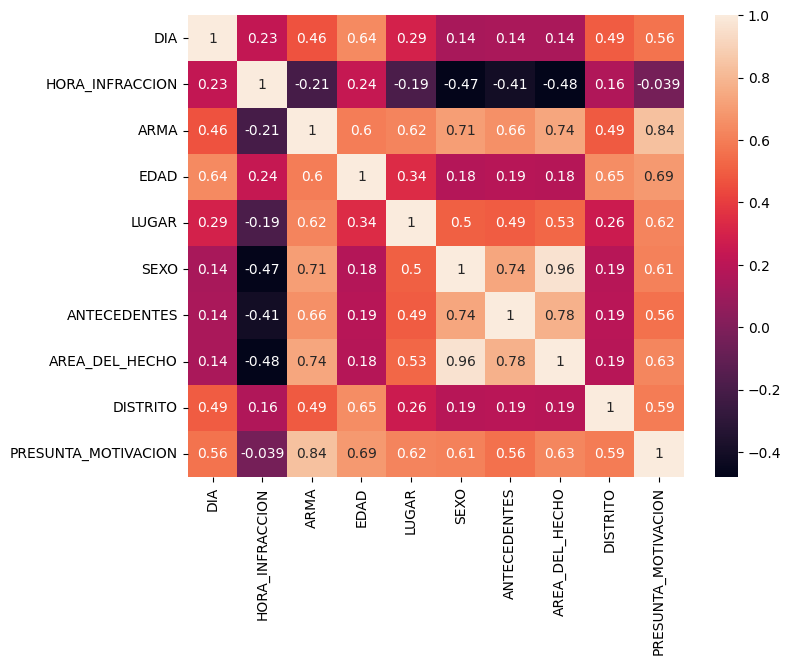

In [22]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [23]:

X = df.iloc[:, [2,7,9,0,8,5,4,6,3]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[1]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,ARMA,AREA_DEL_HECHO,PRESUNTA_MOTIVACION,DIA,DISTRITO,SEXO,LUGAR,ANTECEDENTES,EDAD
0,1,1,1,3,2,1,1,1,1
1,2,1,2,3,1,1,1,1,2
2,2,1,2,2,1,1,2,1,2
3,1,1,1,4,3,1,1,1,3
4,1,1,2,3,1,1,1,1,2


In [24]:

#presentacion de los atributos de destino
Y.head()

,HORA_INFRACCION
0,0
1,2
2,0
3,2
4,3


In [25]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 9414 datos para entrenamiento y 2354 datos para prueba


In [26]:


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 80 to 9412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ARMA                 9414 non-null   int64
 1   AREA_DEL_HECHO       9414 non-null   int64
 2   PRESUNTA_MOTIVACION  9414 non-null   int64
 3   DIA                  9414 non-null   int64
 4   DISTRITO             9414 non-null   int64
 5   SEXO                 9414 non-null   int64
 6   LUGAR                9414 non-null   int64
 7   ANTECEDENTES         9414 non-null   int64
 8   EDAD                 9414 non-null   int64
dtypes: int64(9)
memory usage: 735.5 KB


In [27]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from bayes_opt import BayesianOptimization
# Función para evaluar el modelo SVM con diferentes kernels, parámetros C y decision_function_shape
def svm_evaluate(C, kernel, decision_function_shape):
    kernel_map = {
        0: 'linear',    # Kernel lineal
        1: 'poly',      # Kernel polinómico
        2: 'rbf',       # Kernel de función de base radial
        3: 'sigmoid'    # Kernel sigmoidal
    }
    # Mapeo del valor decision_function_shape (0 = 'ovo', 1 = 'ovr')
    decision_function_shape_map = {
        0: 'ovo',       # Uno contra uno
        1: 'ovr'        # Uno contra todos
    }
    # Convertimos el kernel en un valor entero y lo mapeamos
    svc = SVC(C=C, kernel=kernel_map[int(kernel)], decision_function_shape=decision_function_shape_map[int(decision_function_shape)], random_state=7)
    # Ajustamos el modelo con los datos de entrenamiento
    svc.fit(X_train, y_train.values.ravel())
    # Predicción en el conjunto de prueba
    y_pred = svc.predict(X_test)
    # Devolvemos el precision_score ponderado
    return precision_score(y_test, y_pred, average='micro')
# Definir los límites para los hiperparámetros, incluyendo decision_function_shape
pbounds = {
    'C': (1, 100),                      # El parámetro C varía entre 1 y 100
    'kernel': (0, 3),                    # Valor entero entre 0 y 3 para mapear los kernels ('linear', 'poly', 'rbf', 'sigmoid')
    'decision_function_shape': (0, 1)    # 0 para 'ovo' y 1 para 'ovr'
}
# Inicializar el optimizador bayesiano
optimizer = BayesianOptimization(
    f=svm_evaluate,  # Función objetivo que queremos maximizar
    pbounds=pbounds, # Límites de búsqueda para los hiperparámetros
    random_state=7
)
# Ejecutar el proceso de optimización
optimizer.maximize(
    init_points=5,   # Número de exploraciones aleatorias iniciales
    n_iter=20        # Número de iteraciones de optimización
)
# Imprimir los mejores parámetros encontrados redondeados
best_params = optimizer.max['params']
best_params['C'] = round(best_params['C'], 2)
best_params['kernel'] = int(round(best_params['kernel']))
best_params['decision_function_shape'] = int(round(best_params['decision_function_shape']))
# Mapeo final de los valores encontrados
decision_function_shape_map = {0: 'ovo', 1: 'ovr'}
kernel_map = {0: 'linear', 1: 'poly', 2: 'rbf', 3: 'sigmoid'}
best_params['decision_function_shape'] = decision_function_shape_map[best_params['decision_function_shape']]
best_params['kernel'] = kernel_map[best_params['kernel']]
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", best_params)
# Evaluar el modelo final con los mejores hiperparámetros
svc_best = SVC(C=best_params['C'], kernel=best_params['kernel'], decision_function_shape=best_params['decision_function_shape'], random_state=7)
svc_best.fit(X_train, y_train.values.ravel())
y_pred_best = svc_best.predict(X_test)
# Calcular precisión final
precision_final = precision_score(y_test, y_pred_best, average='micro') * 100
# Imprimir la precisión final como porcentaje
print(f"Precisión final del modelo: {precision_final:.2f}%")

|   iter    |  target   |     C     | decisi... |  kernel   |
-------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/bayes_opt/target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | 0.6614    | 8.555     | 0.7799    | 1.315     |
| 2         | 0.6636    | 72.62     | 0.978     | 1.615     |
| 3         | 0.65      | 50.61     | 0.07205   | 0.8053    |
| 4         | 0.6686    | 50.49     | 0.6792    | 2.411     |
| 5         | 0.6495    | 38.71     | 0.06594   | 0.8644    |
| 6         | 0.6686    | 50.7      | 0.8293    | 2.866     |
| 7         | 0.6686    | 49.37     | 0.6031    | 2.926     |
| 8         | 0.6674    | 47.38     | 0.8771    | 2.845     |
| 9         | 0.6674    | 45.56     | 0.2323    | 2.985     |
| 10        | 0.6606    | 46.15     | 0.9258    | 1.308     |
| 11        | 0.6669    | 43.65     | 0.4093    | 2.9       |
| 12        | 0.6606    | 43.06     | 0.05562   | 1.084     |
| 13        | 0.6686    | 53.0      | 0.6903    | 2.993     |
| 14        | 0.6686    | 54.67     | 0.6205    | 2.991     |
| 15        | 0.6614    | 53.93     | 0.8702    | 1.469     |
| 16        | 0.6686    | 56.43     | 0.1176    | 2.91      |
| 17    

In [43]:
# Cargamos la librería Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Llamamos al constructor de Support Vector Machine
classifier = SVC(kernel='rbf', C=50.49, decision_function_shape='ovr')

# Entrenamos el modelo
svm_modelo = classifier.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:

# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_hora.xlsx")

              precision    recall  f1-score      support
0              0.833713  0.686679  0.753086   533.000000
1              0.937028  0.670270  0.781513   555.000000
2              0.852090  0.419304  0.562036   632.000000
3              0.473074  0.900631  0.620315   634.000000
accuracy       0.668649  0.668649  0.668649     0.668649
macro avg      0.773976  0.669221  0.679238  2354.000000
weighted avg   0.765875  0.668649  0.672736  2354.000000


In [45]:
from sklearn import metrics
import pandas as pd

reporte = metrics.classification_report(y_test, y_pred, output_dict=True)

# Extraer solo la precisión de cada clase, excluyendo métricas agregadas
precision = {class_name: metrics['precision'] for class_name, metrics in reporte.items() if isinstance(metrics, dict)}

# Convertir a DataFrame
precision_df = pd.DataFrame(list(precision.items()), columns=['Clase', 'Precisión'])

# Imprimir el DataFrame
print(precision_df)


          Clase  Precisión
0             0   0.833713
1             1   0.937028
2             2   0.852090
3             3   0.473074
4     macro avg   0.773976
5  weighted avg   0.765875


In [46]:

y_test.head()

,HORA_INFRACCION
0,1
1,1
2,3
3,2
4,3


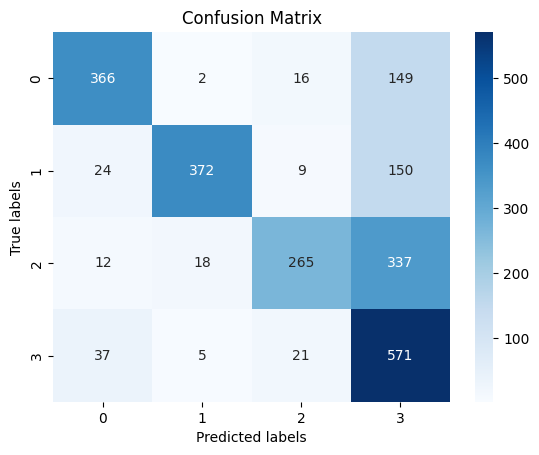

In [47]:

#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [48]:

cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_hora.xlsx")

     0    1    2    3
0  366    2   16  149
1   24  372    9  150
2   12   18  265  337
3   37    5   21  571


In [49]:

#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['hora_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)


,hora_prediccion,HORA_INFRACCION
0,3,1
1,1,1
2,3,3
3,0,2
4,3,3
5,2,2
6,1,1
7,3,3
8,1,1
9,3,2


In [50]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

def v_cruzada_svm(svm_modelo, X_train, y_train):
    # Convertir y_train a un array unidimensional
    y_train = y_train.values.ravel()

    # Definir los scorers para precisión, accuracy y recall
    precision_scorer = make_scorer(precision_score, average='micro')
    accuracy_scorer = make_scorer(accuracy_score)  # No necesita parámetro average
    recall_scorer = make_scorer(recall_score, average='micro')

    seed = 7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)  # shuffle para activar el random state

    # Realiza la validación cruzada para precisión
    cv_results_precision = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=precision_scorer)
    print("Iteraciones validación cruzada (Precisión):\n", cv_results_precision)
    msg_precision = "%f (%f)" % (cv_results_precision.mean(), cv_results_precision.std())
    print("Precisión media:\n", msg_precision)

    # Realiza la validación cruzada para accuracy
    cv_results_accuracy = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=accuracy_scorer)
    print("Iteraciones validación cruzada (Accuracy):\n", cv_results_accuracy)
    msg_accuracy = "%f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std())
    print("Accuracy media:\n", msg_accuracy)

    # Realiza la validación cruzada para recall
    cv_results_recall = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=recall_scorer)
    print("Iteraciones validación cruzada (Recall):\n", cv_results_recall)
    msg_recall = "%f (%f)" % (cv_results_recall.mean(), cv_results_recall.std())
    print("Recall media:\n", msg_recall)




In [51]:
v_cruzada_svm(svm_modelo, X_train, y_train)

Iteraciones validación cruzada (Precisión):
 [0.67551779 0.67073818 0.66436537 0.67073818 0.67853348]
Precisión media:
 0.671979 (0.004828)
Iteraciones validación cruzada (Accuracy):
 [0.67551779 0.67073818 0.66436537 0.67073818 0.67853348]
Accuracy media:
 0.671979 (0.004828)
Iteraciones validación cruzada (Recall):
 [0.67551779 0.67073818 0.66436537 0.67073818 0.67853348]
Recall media:
 0.671979 (0.004828)


In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming y_pred and y_test are defined
print('Precision: ', precision_score(y_test, y_pred, average='micro') * 100)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Recall: ', recall_score(y_test, y_pred, average='micro') * 100)

Precision:  66.86491079014444
Accuracy:  66.86491079014444
Recall:  66.86491079014444


In [53]:
df_combined['HORA_INFRACCION'] = df_combined['HORA_INFRACCION'].apply(lambda x:
                                                                  'H01 hasta H06' if x == 0 else
                                                                  'H07 hasta H12' if x == 1 else
                                                                  'H13 hasta H18' if x == 2 else
                                                                  'H19 hasta H00'
                                                                 )





In [54]:
df_combined['hora_prediccion'] = df_combined['hora_prediccion'].apply(lambda x:
                                                                  'H01 hasta H06' if x == 0 else
                                                                  'H07 hasta H12' if x == 1 else
                                                                  'H13 hasta H18' if x == 2 else
                                                                  'H19 hasta H00'
                                                                 )




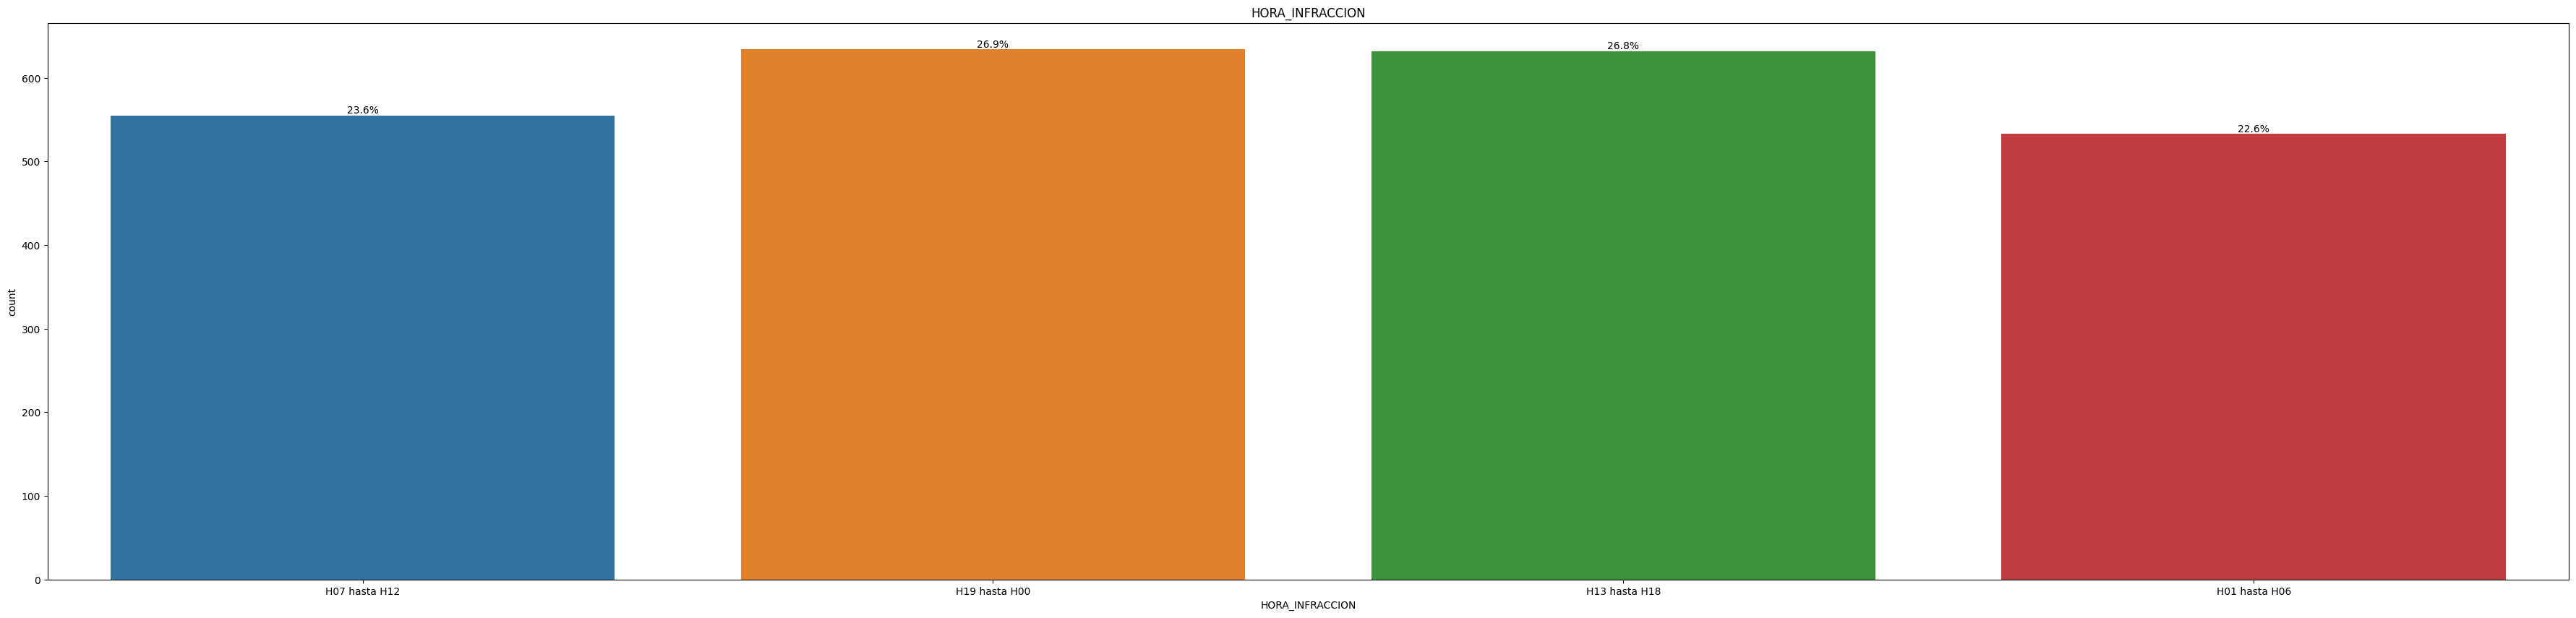

In [55]:

import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='HORA_INFRACCION',hue = 'HORA_INFRACCION', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('HORA_INFRACCION')

for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_HORA_INFRACCION.png")

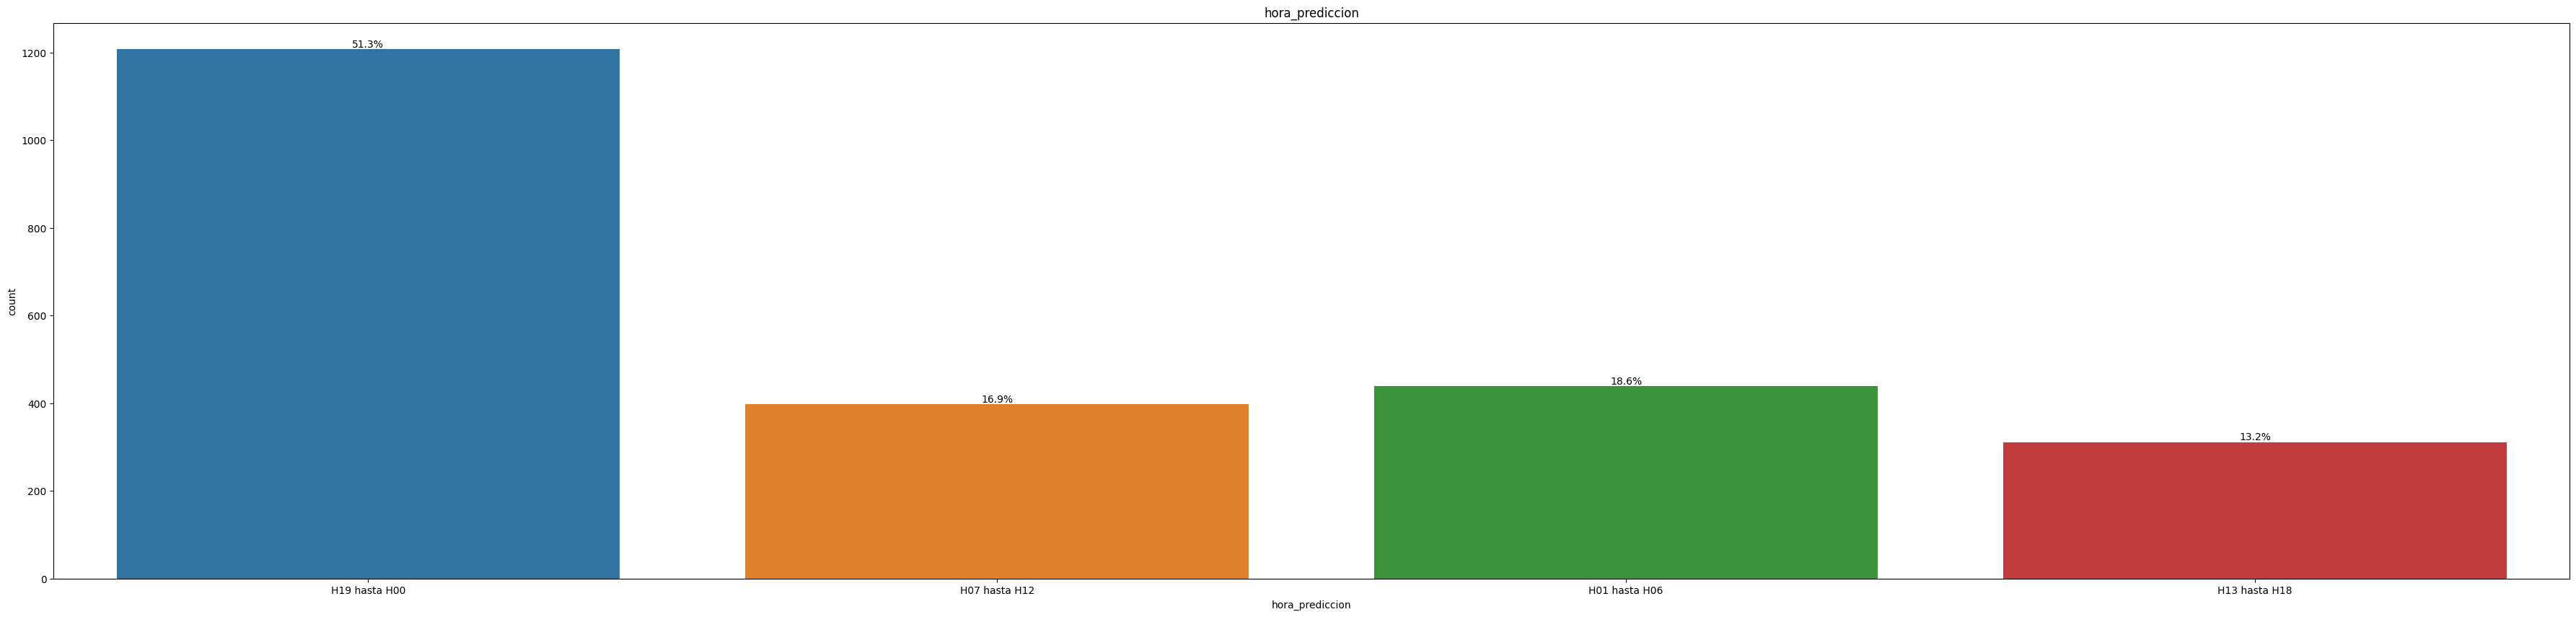

In [56]:


ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='hora_prediccion',hue = 'hora_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('hora_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_hora.png")

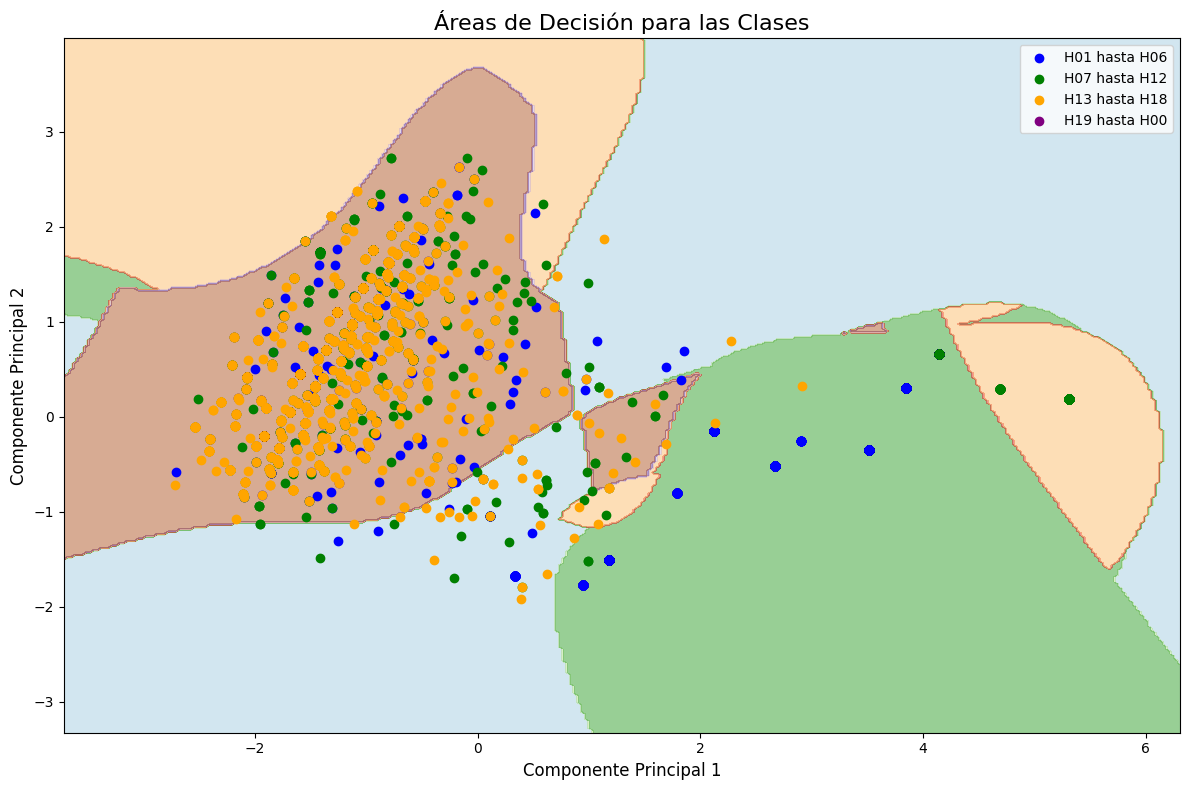

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Reducir las dimensiones con PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Entrenar el modelo SVM con las 2 dimensiones reducidas
classifier_pca = SVC(kernel='rbf', C=50.49, decision_function_shape='ovr')
classifier_pca.fit(X_train_2D, y_train.values.ravel())

# Crear una malla para la visualización
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Obtener las predicciones para cada punto en la malla
Z = classifier_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar el área de decisión
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)  # Regiones de decisión

# Colores y etiquetas para las 4 clases
class_labels = {
    1: 'H01 hasta H06',
    2: 'H07 hasta H12',
    3: 'H13 hasta H18',
    4: 'H19 hasta H00'

}
colors = ['blue', 'green', 'orange', 'purple']

# Graficar los puntos de las clases
for class_value, color in zip(class_labels.keys(), colors):
    plt.scatter(
        X_train_2D[y_train.values.ravel() == class_value, 0],
        X_train_2D[y_train.values.ravel() == class_value, 1],
        color=color,
        label=class_labels[class_value]
    )

# Etiquetas y título
plt.title('Áreas de Decisión para las Clases', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

# Mostrar la gráfica
plt.show()